<ipython-input-10-a957a3de1fe8>:26: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum(np.square(predictions - y))
<ipython-input-10-a957a3de1fe8>:36: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (1/m) * learning_rate * (X_train.T.dot(predictions - y_train))


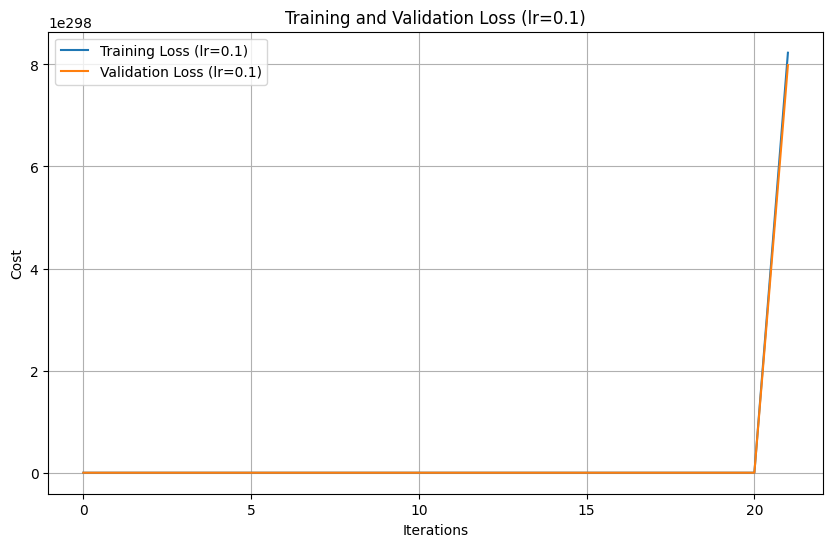

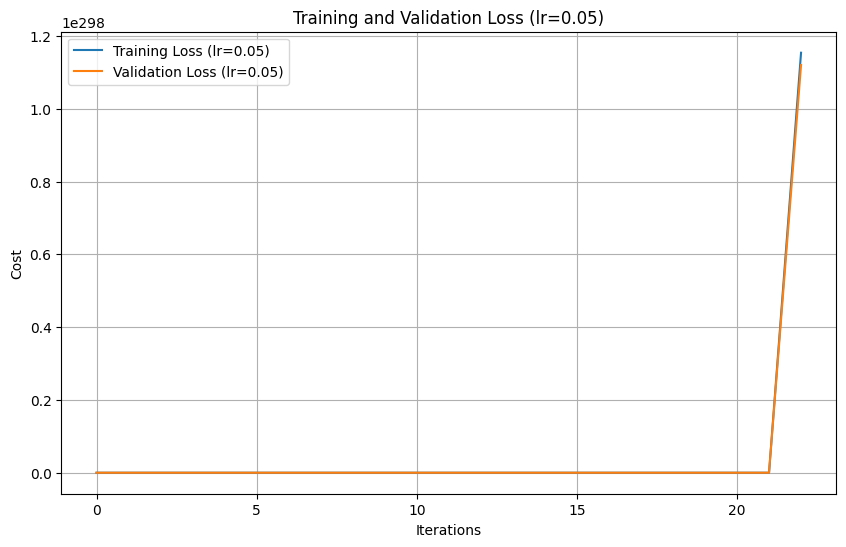

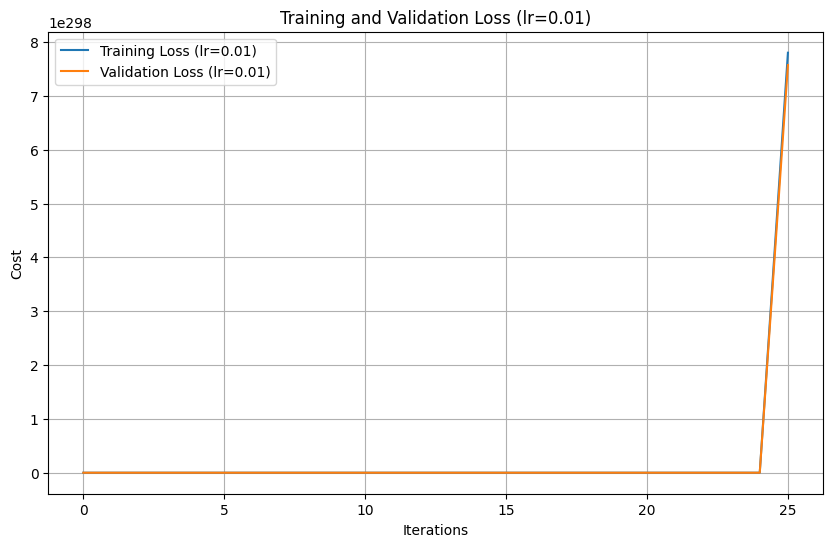

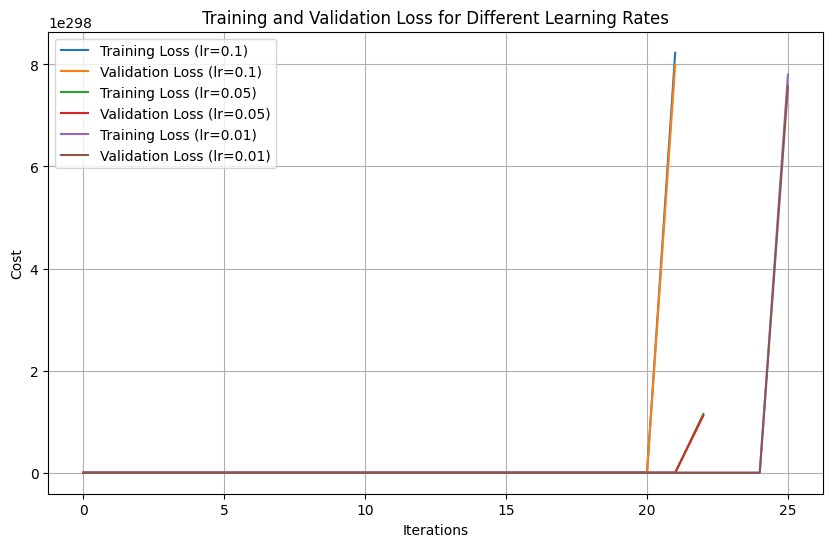

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('Housing.csv')

# Extract the relevant columns for Problem 1a without normalization
X_1a = data.iloc[:, [1, 2, 3, 4, 10]].values
y_1a = data.iloc[:, 0].values

# Split the data into training and validation sets (80% training, 20% validation)
X_train_1a, X_val_1a, y_train_1a, y_val_1a = train_test_split(X_1a, y_1a, test_size=0.2, random_state=42)

# Add a column of ones for the bias term
X_train_1a = np.c_[np.ones(X_train_1a.shape[0]), X_train_1a]
X_val_1a = np.c_[np.ones(X_val_1a.shape[0]), X_val_1a]

def initialize_parameters(n):
    return np.zeros(n)

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X_train, y_train, X_val, y_val, theta, learning_rate, iterations):
    m = len(y_train)
    train_cost_history = np.zeros(iterations)
    val_cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X_train.dot(theta)
        theta = theta - (1/m) * learning_rate * (X_train.T.dot(predictions - y_train))
        train_cost_history[i] = compute_cost(X_train, y_train, theta)
        val_cost_history[i] = compute_cost(X_val, y_val, theta)

    return theta, train_cost_history, val_cost_history

learning_rates = [0.1, 0.05, 0.01]
iterations = 1000

# Initialize dictionaries to store histories for each learning rate
train_histories = {}
val_histories = {}

for lr in learning_rates:
    theta = initialize_parameters(X_train_1a.shape[1])
    theta, train_cost_history, val_cost_history = gradient_descent(X_train_1a, y_train_1a, X_val_1a, y_val_1a, theta, lr, iterations)
    train_histories[lr] = train_cost_history
    val_histories[lr] = val_cost_history

    # Plot the training and validation losses for the current learning rate
    plt.figure(figsize=(10, 6))
    plt.plot(range(iterations), train_cost_history, label=f'Training Loss (lr={lr})')
    plt.plot(range(iterations), val_cost_history, label=f'Validation Loss (lr={lr})')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title(f'Training and Validation Loss (lr={lr})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Optionally, plot all learning rates together for comparison
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(range(iterations), train_histories[lr], label=f'Training Loss (lr={lr})')
    plt.plot(range(iterations), val_histories[lr], label=f'Validation Loss (lr={lr})')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-11-32b189baa6d0>:42: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum(np.square(predictions - y))
<ipython-input-11-32b189baa6d0>:52: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (1/m) * learning_rate * (X_train.T.dot(predictions - y_train))


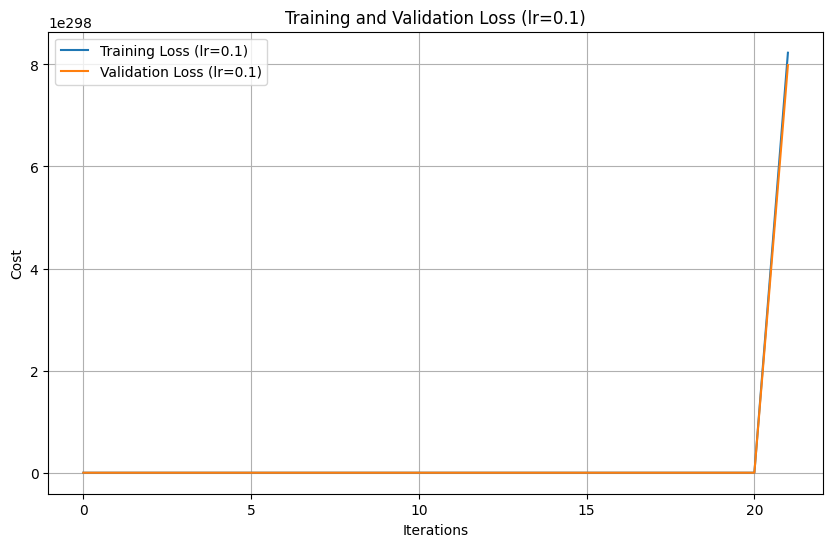

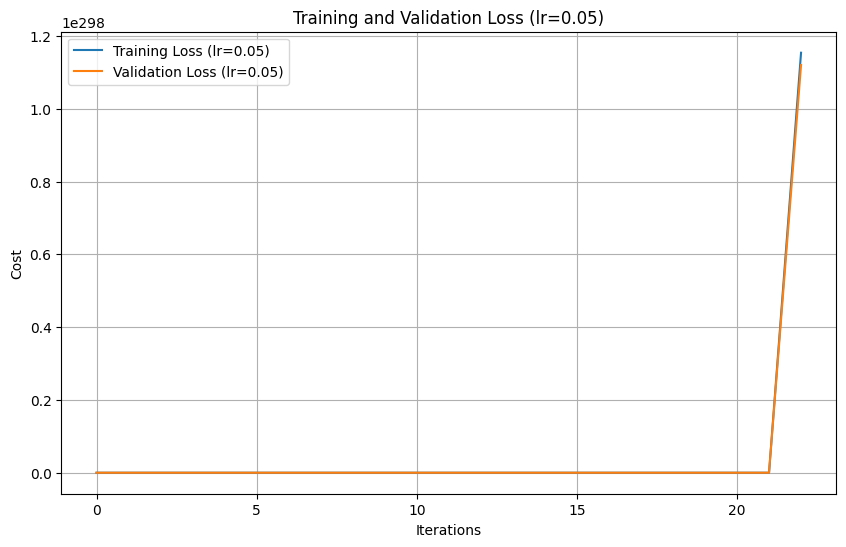

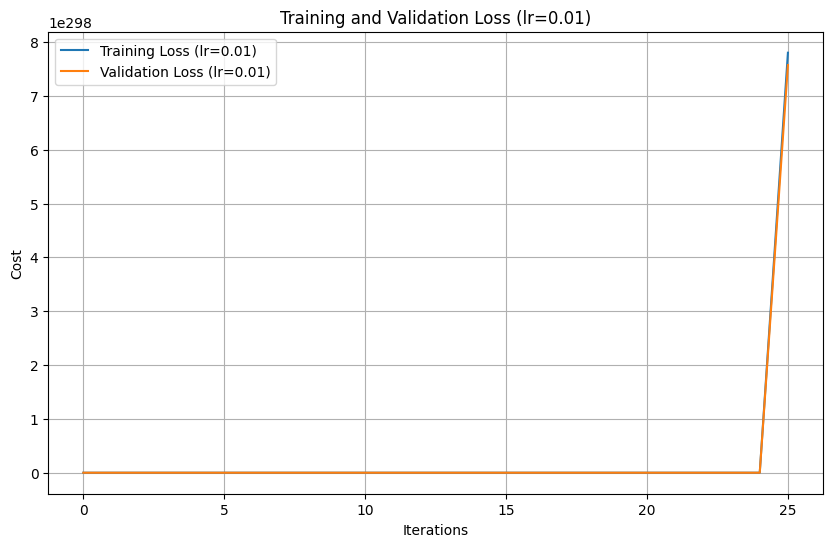

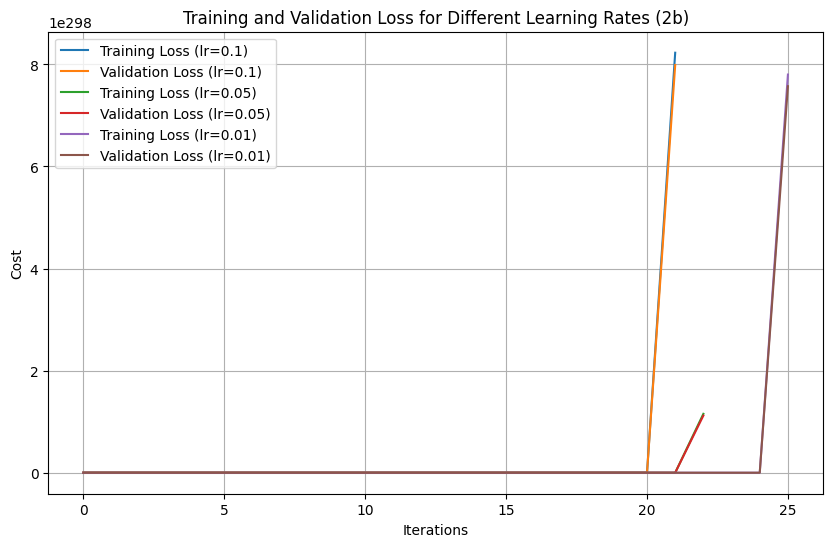

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the data
data = pd.read_csv('Housing.csv')

# Extract the relevant columns for Problem 2b
X_2b = data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]].values
y_2b = data.iloc[:, 0].values

# Encode categorical variables (mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea)
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), [4, 5, 6, 7, 8, 10])
    ],
    remainder='passthrough'
)

# Apply column transformer
X_2b = column_transformer.fit_transform(X_2b)

# Convert all columns to float64
X_2b = X_2b.astype(np.float64)

# Split the data into training and validation sets (80% training, 20% validation)
X_train_2b, X_val_2b, y_train_2b, y_val_2b = train_test_split(X_2b, y_2b, test_size=0.2, random_state=42)

# Add a column of ones for the bias term
X_train_2b = np.c_[np.ones(X_train_2b.shape[0]), X_train_2b]
X_val_2b = np.c_[np.ones(X_val_2b.shape[0]), X_val_2b]

def initialize_parameters(n):
    return np.zeros(n)

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X_train, y_train, X_val, y_val, theta, learning_rate, iterations):
    m = len(y_train)
    train_cost_history = np.zeros(iterations)
    val_cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X_train.dot(theta)
        theta = theta - (1/m) * learning_rate * (X_train.T.dot(predictions - y_train))
        train_cost_history[i] = compute_cost(X_train, y_train, theta)
        val_cost_history[i] = compute_cost(X_val, y_val, theta)

    return theta, train_cost_history, val_cost_history

learning_rates = [0.1, 0.05, 0.01]
iterations = 1000

# Initialize dictionaries to store histories for each learning rate
train_histories = {}
val_histories = {}

for lr in learning_rates:
    theta = initialize_parameters(X_train_2b.shape[1])
    theta, train_cost_history, val_cost_history = gradient_descent(X_train_2b, y_train_2b, X_val_2b, y_val_2b, theta, lr, iterations)
    train_histories[lr] = train_cost_history
    val_histories[lr] = val_cost_history

    # Plot the training and validation losses for the current learning rate
    plt.figure(figsize=(10, 6))
    plt.plot(range(iterations), train_cost_history, label=f'Training Loss (lr={lr})')
    plt.plot(range(iterations), val_cost_history, label=f'Validation Loss (lr={lr})')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title(f'Training and Validation Loss (lr={lr})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Optionally, plot all learning rates together for comparison
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(range(iterations), train_histories[lr], label=f'Training Loss (lr={lr})')
    plt.plot(range(iterations), val_histories[lr], label=f'Validation Loss (lr={lr})')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss for Different Learning Rates (2b)')
plt.legend()
plt.grid(True)
plt.show()


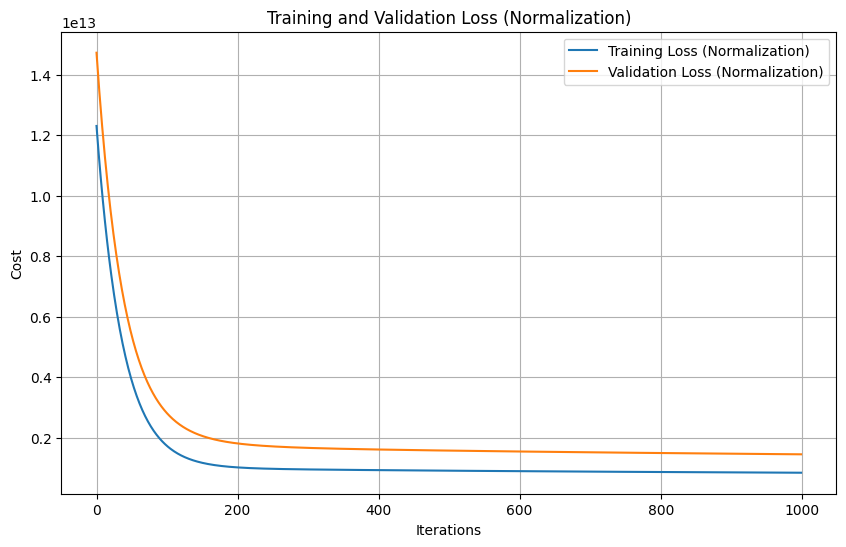

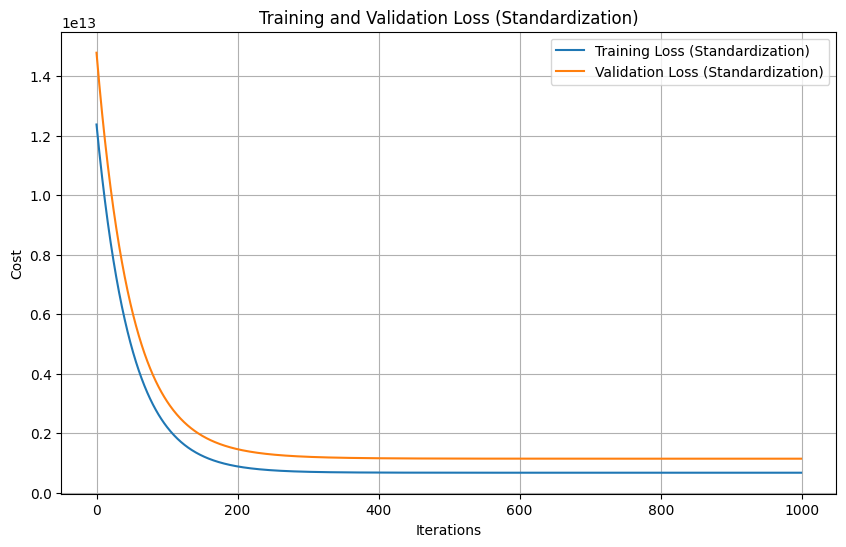

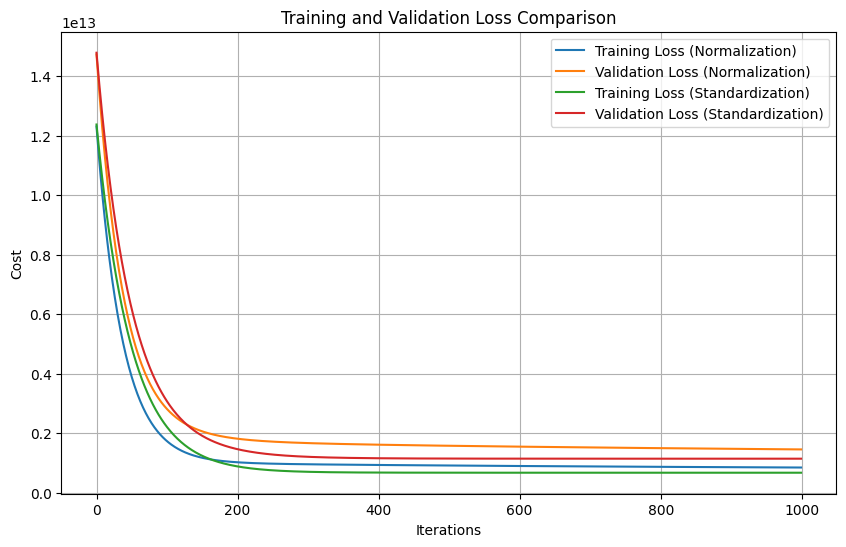

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('Housing.csv')

# Extract the relevant columns for Problem 1a
X = data.iloc[:, [1, 2, 3, 4, 10]].values
y = data.iloc[:, 0].values

# Normalize the features (Min-Max Normalization)
X_norm = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Split the data into training and validation sets (80% training, 20% validation)
X_train_norm, X_val_norm, y_train_norm, y_val_norm = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# Add a column of ones for the bias term
X_train_norm = np.c_[np.ones(X_train_norm.shape[0]), X_train_norm]
X_val_norm = np.c_[np.ones(X_val_norm.shape[0]), X_val_norm]

# Define functions for initialization, cost computation, and gradient descent
def initialize_parameters(n):
    return np.zeros(n)

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X_train, y_train, X_val, y_val, theta, learning_rate, iterations):
    m = len(y_train)
    train_cost_history = np.zeros(iterations)
    val_cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X_train.dot(theta)
        theta = theta - (1/m) * learning_rate * (X_train.T.dot(predictions - y_train))
        train_cost_history[i] = compute_cost(X_train, y_train, theta)
        val_cost_history[i] = compute_cost(X_val, y_val, theta)

    return theta, train_cost_history, val_cost_history

# Set parameters
learning_rate = 0.01
iterations = 1000

# Train the model using normalized inputs
theta_norm = initialize_parameters(X_train_norm.shape[1])
theta_norm, train_cost_history_norm, val_cost_history_norm = gradient_descent(
    X_train_norm, y_train_norm, X_val_norm, y_val_norm, theta_norm, learning_rate, iterations
)

# Plot the training and validation losses for normalization
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), train_cost_history_norm, label='Training Loss (Normalization)')
plt.plot(range(iterations), val_cost_history_norm, label='Validation Loss (Normalization)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss (Normalization)')
plt.legend()
plt.grid(True)
plt.show()

# Standardize the features (Standardization)
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

# Split the data into training and validation sets (80% training, 20% validation)
X_train_std, X_val_std, y_train_std, y_val_std = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Add a column of ones for the bias term
X_train_std = np.c_[np.ones(X_train_std.shape[0]), X_train_std]
X_val_std = np.c_[np.ones(X_val_std.shape[0]), X_val_std]

# Train the model using standardized inputs
theta_std = initialize_parameters(X_train_std.shape[1])
theta_std, train_cost_history_std, val_cost_history_std = gradient_descent(
    X_train_std, y_train_std, X_val_std, y_val_std, theta_std, learning_rate, iterations
)

# Plot the training and validation losses for standardization
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), train_cost_history_std, label='Training Loss (Standardization)')
plt.plot(range(iterations), val_cost_history_std, label='Validation Loss (Standardization)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss (Standardization)')
plt.legend()
plt.grid(True)
plt.show()

# Comparison plot for normalization, standardization, and baseline (Problem 1a)
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), train_cost_history_norm, label='Training Loss (Normalization)')
plt.plot(range(iterations), val_cost_history_norm, label='Validation Loss (Normalization)')
plt.plot(range(iterations), train_cost_history_std, label='Training Loss (Standardization)')
plt.plot(range(iterations), val_cost_history_std, label='Validation Loss (Standardization)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()


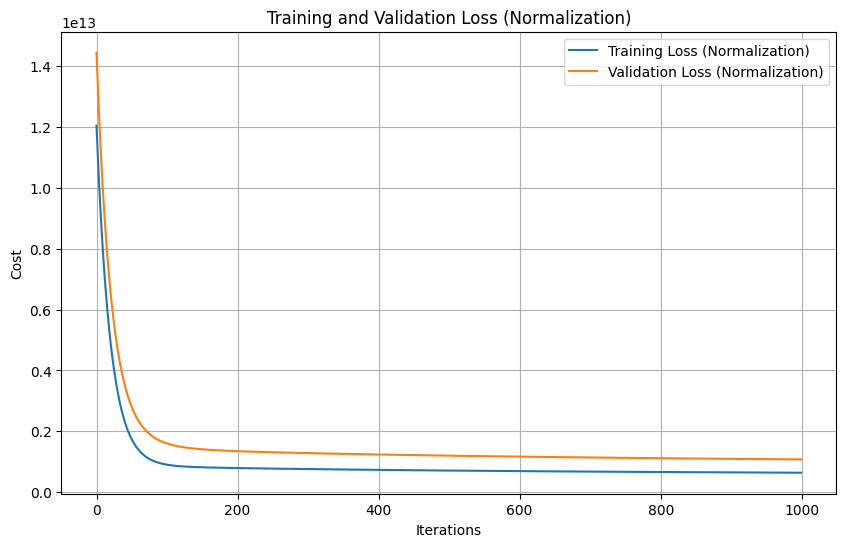

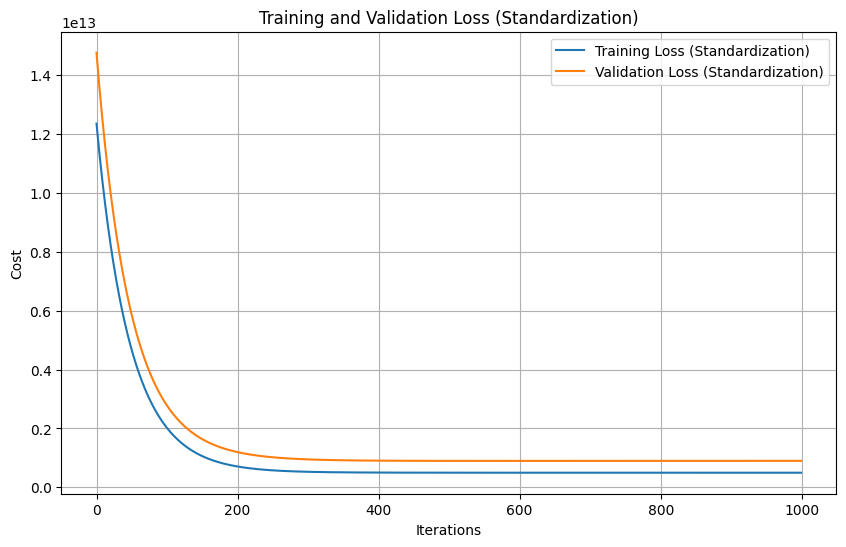

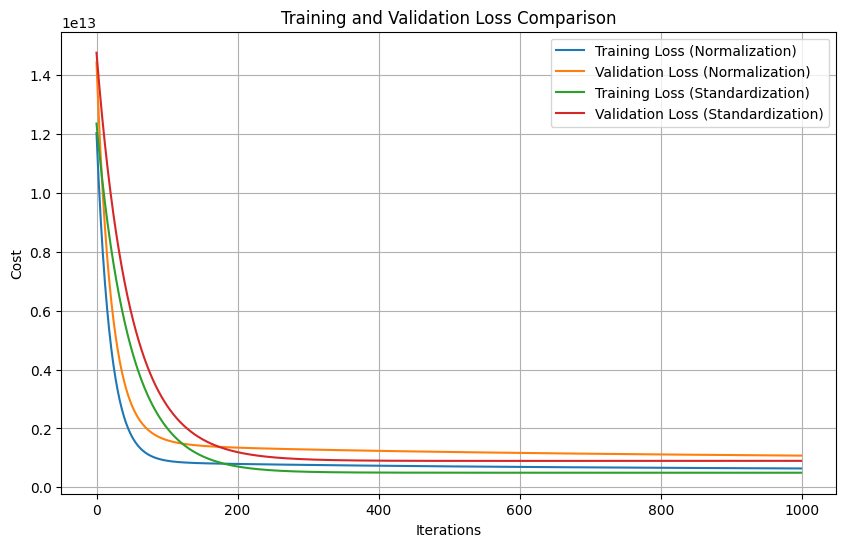

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the data
data = pd.read_csv('Housing.csv')

# Extract the relevant columns for Problem 1b
X = data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]].values
y = data.iloc[:, 0].values

# Encode categorical variables (mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea)
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), [4, 5, 6, 7, 8, 10])
    ],
    remainder='passthrough'
)

# Apply column transformer
X = column_transformer.fit_transform(X)

# Ensure all columns are float64
X = X.astype(np.float64)

# Normalize the features (Min-Max Normalization)
X_norm = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Split the data into training and validation sets (80% training, 20% validation)
X_train_norm, X_val_norm, y_train_norm, y_val_norm = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# Add a column of ones for the bias term
X_train_norm = np.c_[np.ones(X_train_norm.shape[0]), X_train_norm]
X_val_norm = np.c_[np.ones(X_val_norm.shape[0]), X_val_norm]

# Define functions for initialization, cost computation, and gradient descent
def initialize_parameters(n):
    return np.zeros(n)

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X_train, y_train, X_val, y_val, theta, learning_rate, iterations):
    m = len(y_train)
    train_cost_history = np.zeros(iterations)
    val_cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X_train.dot(theta)
        theta = theta - (1/m) * learning_rate * (X_train.T.dot(predictions - y_train))
        train_cost_history[i] = compute_cost(X_train, y_train, theta)
        val_cost_history[i] = compute_cost(X_val, y_val, theta)

    return theta, train_cost_history, val_cost_history

# Set parameters
learning_rate = 0.01
iterations = 1000

# Train the model using normalized inputs
theta_norm = initialize_parameters(X_train_norm.shape[1])
theta_norm, train_cost_history_norm, val_cost_history_norm = gradient_descent(
    X_train_norm, y_train_norm, X_val_norm, y_val_norm, theta_norm, learning_rate, iterations
)

# Plot the training and validation losses for normalization
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), train_cost_history_norm, label='Training Loss (Normalization)')
plt.plot(range(iterations), val_cost_history_norm, label='Validation Loss (Normalization)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss (Normalization)')
plt.legend()
plt.grid(True)
plt.show()

# Standardize the features (Standardization)
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

# Split the data into training and validation sets (80% training, 20% validation)
X_train_std, X_val_std, y_train_std, y_val_std = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Add a column of ones for the bias term
X_train_std = np.c_[np.ones(X_train_std.shape[0]), X_train_std]
X_val_std = np.c_[np.ones(X_val_std.shape[0]), X_val_std]

# Train the model using standardized inputs
theta_std = initialize_parameters(X_train_std.shape[1])
theta_std, train_cost_history_std, val_cost_history_std = gradient_descent(
    X_train_std, y_train_std, X_val_std, y_val_std, theta_std, learning_rate, iterations
)

# Plot the training and validation losses for standardization
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), train_cost_history_std, label='Training Loss (Standardization)')
plt.plot(range(iterations), val_cost_history_std, label='Validation Loss (Standardization)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss (Standardization)')
plt.legend()
plt.grid(True)
plt.show()

# Comparison plot for normalization, standardization, and baseline (Problem 1b)
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), train_cost_history_norm, label='Training Loss (Normalization)')
plt.plot(range(iterations), val_cost_history_norm, label='Validation Loss (Normalization)')
plt.plot(range(iterations), train_cost_history_std, label='Training Loss (Standardization)')
plt.plot(range(iterations), val_cost_history_std, label='Validation Loss (Standardization)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()


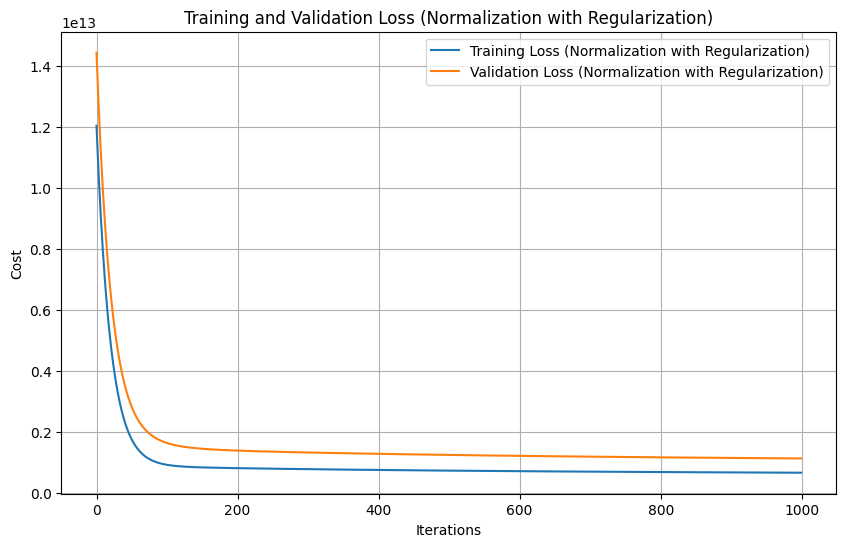

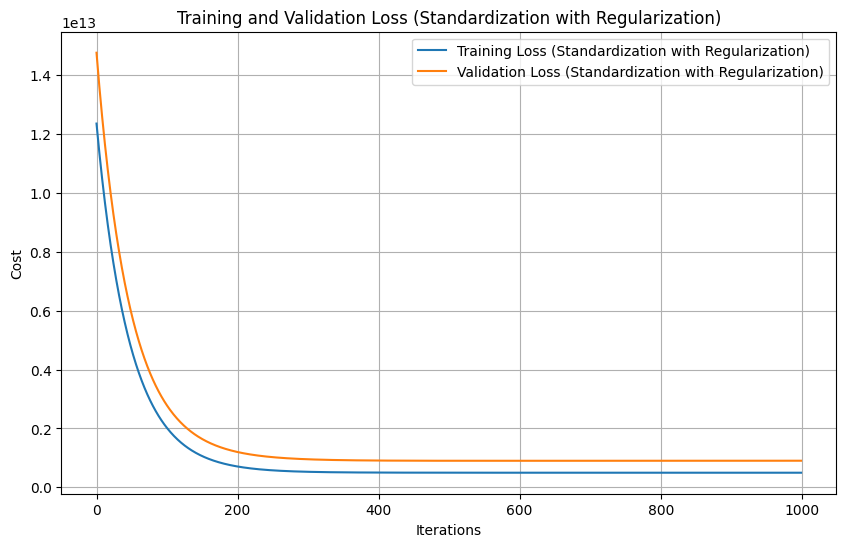

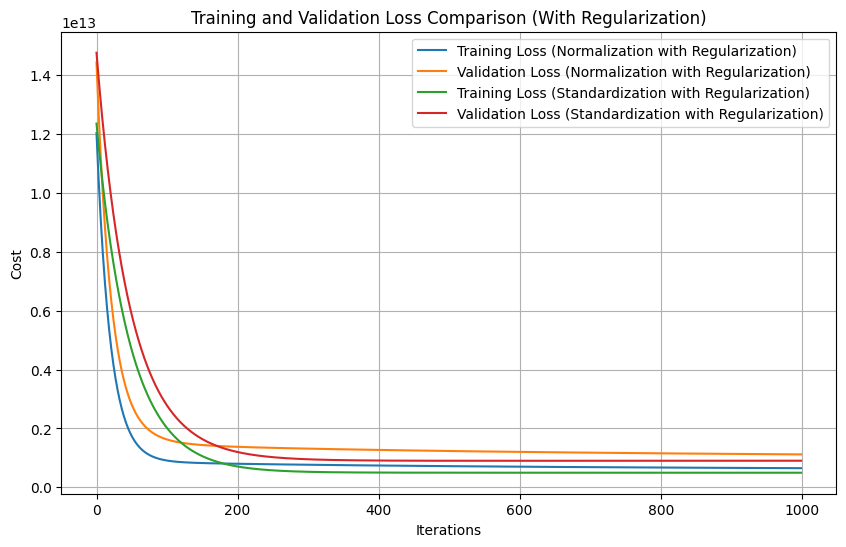

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the data
data = pd.read_csv('Housing.csv')

# Extract the relevant columns for Problem 1b
X = data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]].values
y = data.iloc[:, 0].values

# Encode categorical variables (mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea)
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), [4, 5, 6, 7, 8, 10])
    ],
    remainder='passthrough'
)

# Apply column transformer
X = column_transformer.fit_transform(X)

# Ensure all columns are float64
X = X.astype(np.float64)

# Normalize the features (Min-Max Normalization)
X_norm = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Standardize the features (Standardization)
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

# Split the data into training and validation sets (80% training, 20% validation)
X_train_norm, X_val_norm, y_train_norm, y_val_norm = train_test_split(X_norm, y, test_size=0.2, random_state=42)
X_train_std, X_val_std, y_train_std, y_val_std = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Add a column of ones for the bias term
X_train_norm = np.c_[np.ones(X_train_norm.shape[0]), X_train_norm]
X_val_norm = np.c_[np.ones(X_val_norm.shape[0]), X_val_norm]
X_train_std = np.c_[np.ones(X_train_std.shape[0]), X_train_std]
X_val_std = np.c_[np.ones(X_val_std.shape[0]), X_val_std]

# Define functions for initialization, cost computation with regularization, and gradient descent with regularization
def initialize_parameters(n):
    return np.zeros(n)

def compute_cost_regularized(X, y, theta, lambda_reg):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y)) + (lambda_reg/(2*m)) * np.sum(np.square(theta[1:]))
    return cost

def gradient_descent_regularized(X_train, y_train, X_val, y_val, theta, learning_rate, iterations, lambda_reg):
    m = len(y_train)
    train_cost_history = np.zeros(iterations)
    val_cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X_train.dot(theta)
        theta = theta - (1/m) * learning_rate * (X_train.T.dot(predictions - y_train) + lambda_reg * np.r_[[0], theta[1:]])
        train_cost_history[i] = compute_cost_regularized(X_train, y_train, theta, lambda_reg)
        val_cost_history[i] = compute_cost_regularized(X_val, y_val, theta, lambda_reg)

    return theta, train_cost_history, val_cost_history

# Set parameters
learning_rate = 0.01
iterations = 1000
lambda_reg = 1  # Regularization parameter

# Train the model using normalized inputs with regularization
theta_norm_reg = initialize_parameters(X_train_norm.shape[1])
theta_norm_reg, train_cost_history_norm_reg, val_cost_history_norm_reg = gradient_descent_regularized(
    X_train_norm, y_train_norm, X_val_norm, y_val_norm, theta_norm_reg, learning_rate, iterations, lambda_reg
)

# Train the model using standardized inputs with regularization
theta_std_reg = initialize_parameters(X_train_std.shape[1])
theta_std_reg, train_cost_history_std_reg, val_cost_history_std_reg = gradient_descent_regularized(
    X_train_std, y_train_std, X_val_std, y_val_std, theta_std_reg, learning_rate, iterations, lambda_reg
)

# Plot the training and validation losses for normalization with regularization
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), train_cost_history_norm_reg, label='Training Loss (Normalization with Regularization)')
plt.plot(range(iterations), val_cost_history_norm_reg, label='Validation Loss (Normalization with Regularization)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss (Normalization with Regularization)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the training and validation losses for standardization with regularization
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), train_cost_history_std_reg, label='Training Loss (Standardization with Regularization)')
plt.plot(range(iterations), val_cost_history_std_reg, label='Validation Loss (Standardization with Regularization)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss (Standardization with Regularization)')
plt.legend()
plt.grid(True)
plt.show()

# Comparison plot for normalization and standardization with regularization
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), train_cost_history_norm_reg, label='Training Loss (Normalization with Regularization)')
plt.plot(range(iterations), val_cost_history_norm_reg, label='Validation Loss (Normalization with Regularization)')
plt.plot(range(iterations), train_cost_history_std_reg, label='Training Loss (Standardization with Regularization)')
plt.plot(range(iterations), val_cost_history_std_reg, label='Validation Loss (Standardization with Regularization)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss Comparison (With Regularization)')
plt.legend()
plt.grid(True)
plt.show()


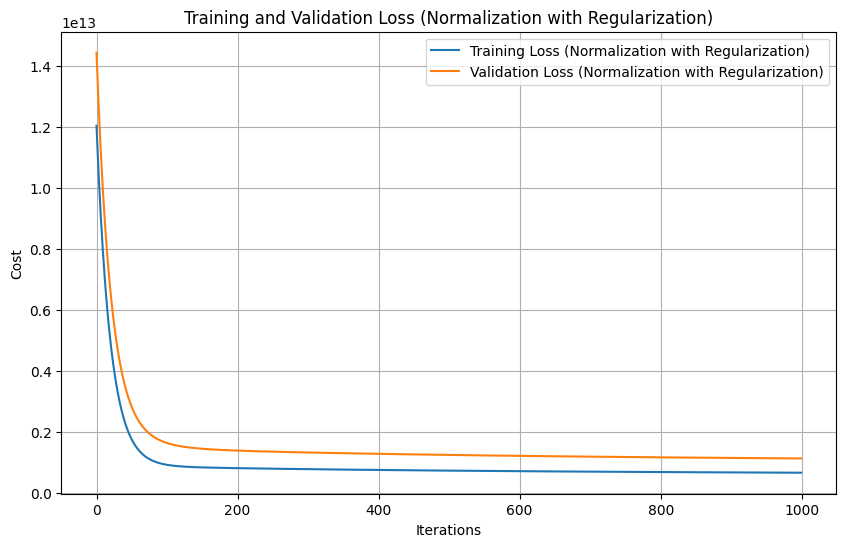

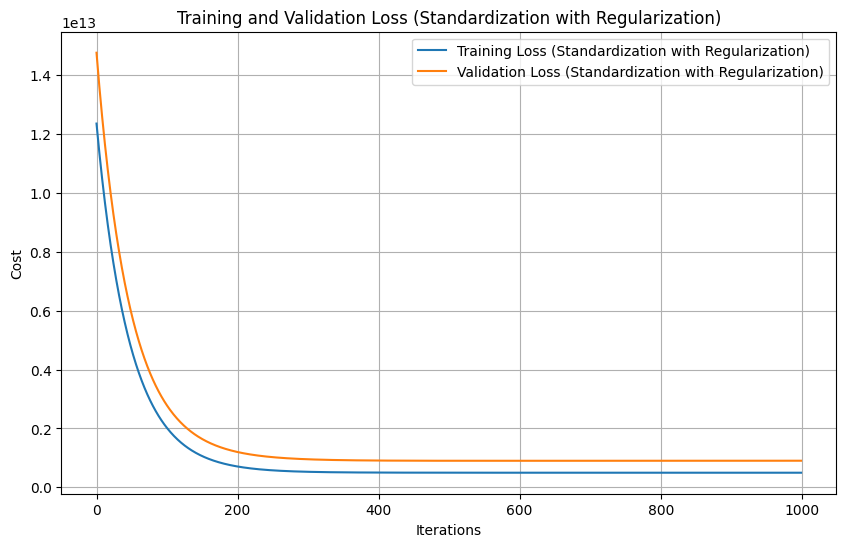

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the data
data = pd.read_csv('Housing.csv')

# Extract the relevant columns for Problem 1b
X = data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]].values
y = data.iloc[:, 0].values

# Encode categorical variables (mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea)
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), [4, 5, 6, 7, 8, 10])
    ],
    remainder='passthrough'
)

# Apply column transformer
X = column_transformer.fit_transform(X)

# Ensure all columns are float64
X = X.astype(np.float64)

# Normalize the features (Min-Max Normalization)
X_norm = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Standardize the features (Standardization)
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

# Split the data into training and validation sets (80% training, 20% validation)
X_train_norm, X_val_norm, y_train_norm, y_val_norm = train_test_split(X_norm, y, test_size=0.2, random_state=42)
X_train_std, X_val_std, y_train_std, y_val_std = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Add a column of ones for the bias term
X_train_norm = np.c_[np.ones(X_train_norm.shape[0]), X_train_norm]
X_val_norm = np.c_[np.ones(X_val_norm.shape[0]), X_val_norm]
X_train_std = np.c_[np.ones(X_train_std.shape[0]), X_train_std]
X_val_std = np.c_[np.ones(X_val_std.shape[0]), X_val_std]

# Define functions for initialization, cost computation with regularization, and gradient descent with regularization
def initialize_parameters(n):
    return np.zeros(n)

def compute_cost_regularized(X, y, theta, lambda_reg):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y)) + (lambda_reg/(2*m)) * np.sum(np.square(theta[1:]))
    return cost

def gradient_descent_regularized(X_train, y_train, X_val, y_val, theta, learning_rate, iterations, lambda_reg):
    m = len(y_train)
    train_cost_history = np.zeros(iterations)
    val_cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X_train.dot(theta)
        theta = theta - (1/m) * learning_rate * (X_train.T.dot(predictions - y_train) + lambda_reg * np.r_[[0], theta[1:]])
        train_cost_history[i] = compute_cost_regularized(X_train, y_train, theta, lambda_reg)
        val_cost_history[i] = compute_cost_regularized(X_val, y_val, theta, lambda_reg)

    return theta, train_cost_history, val_cost_history

# Set parameters
learning_rate = 0.01
iterations = 1000
lambda_reg = 1  # Regularization parameter

# Train the model using normalized inputs with regularization
theta_norm_reg = initialize_parameters(X_train_norm.shape[1])
theta_norm_reg, train_cost_history_norm_reg, val_cost_history_norm_reg = gradient_descent_regularized(
    X_train_norm, y_train_norm, X_val_norm, y_val_norm, theta_norm_reg, learning_rate, iterations, lambda_reg
)

# Train the model using standardized inputs with regularization
theta_std_reg = initialize_parameters(X_train_std.shape[1])
theta_std_reg, train_cost_history_std_reg, val_cost_history_std_reg = gradient_descent_regularized(
    X_train_std, y_train_std, X_val_std, y_val_std, theta_std_reg, learning_rate, iterations, lambda_reg
)

# Plot the training and validation losses for normalization with regularization
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), train_cost_history_norm_reg, label='Training Loss (Normalization with Regularization)')
plt.plot(range(iterations), val_cost_history_norm_reg, label='Validation Loss (Normalization with Regularization)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss (Normalization with Regularization)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the training and validation losses for standardization with regularization
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), train_cost_history_std_reg, label='Training Loss (Standardization with Regularization)')
plt.plot(range(iterations), val_cost_history_std_reg, label='Validation Loss (Standardization with Regularization)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss (Standardization with Regularization)')
plt.legend()
plt.grid(True)
plt.show()
